<h2 align="center">CuVec: Unifying Python/C++/CUDA memory</h2>
<a href="https://xkcd.com/138"><img src="https://imgs.xkcd.com/comics/pointers.png" alt="xkcd#138" align="left" width="300px" style="border:10px solid white"/></a>

----

**Python buffered array ↔ C++11 `std::vector` ↔ CUDA managed memory**

[![Source](https://img.shields.io/badge/source-AMYPAD/CuVec-black.svg?logo=GitHub)](https://github.com/AMYPAD/CuVec) | [![Docs](https://img.shields.io/badge/docs-amypad.github.io/CuVec-blue.svg?logo=mdbook)](https://amypad.github.io/CuVec) | [![Version](https://img.shields.io/pypi/v/cuvec.svg?logo=python&logoColor=white)](https://github.com/AMYPAD/CuVec/releases)
-|-|-
[![Coverage](https://codecov.io/gh/AMYPAD/CuVec/branch/main/graph/badge.svg)](https://codecov.io/gh/AMYPAD/CuVec) | [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.4446211.svg)](https://doi.org/10.5281/zenodo.4446211)

3 May 2023 <a href="https://cdcl.ml">Casper da Costa-Luis</a>

- originally thought of this close to 1 decade ago when writing CUDA/C++/Python working FT at Sony EU HQ realtime machine vision (b4 PhD)
- sick of reimplementing boilerplate
- amazingly nobody solved problem, so I snapped and recently implemented solution ~2ya
- docs site has full tutorials/examples
- but presentation covers main points

# Motivation

- One problem, one language
- Two problems, two languages
  + interfaces

- start with issue
- programming languages tend to target one problem
  + Python quick prototyping, C++ quick runtime, CUDA same but for highly parallelisable probs
- issue: what if you have multi probs?
  + write in 2 langs
  + pass data between
  + data interfaces are painful

## Prior Art

- Lots of boilerplate (CPython API)
- Pre-TensorFlow/PyTorch (no high-level frameworks)
- Pre-SSDs (HDD I/O)

- ^
- ^
- few lines of code in 1 lang to save arr to disk, few lines in different lang to load from disk
- "easy" to implement, but slow to run + error-prone (dtype conversion, big/small endian, C vs FORTRAN array indexing)

## New Hope: Language Features

- C++11 ([ISO/IEC#14882:2011](www.iso.org/iso/iso_catalogue/catalogue_tc/catalogue_detail.htm?csnumber=50372) alias templates, container/`std::vector` allocators)
- CUDA 6 ([unified memory](https://developer.download.nvidia.com/compute/cuda/6_0/rel/docs/CUDA_Toolkit_Release_Notes.pdf))
- Python 3 ([PEP#3118](https://peps.python.org/pep-3118) array [buffer protocol](https://docs.python.org/3/c-api/buffer.html)), 3.6 ([`float16`](https://doi.org/10.1109/IEEESTD.2019.8766229))
- Python [`__cuda_array_interface__`](https://numba.readthedocs.io/en/latest/cuda/cuda_array_interface.html) (Numba, CuPy, PyTorch, PyArrow, ArrayViews, JAX, PyCUDA, DALI, RAPIDS, ...)

- 2011-12: milestone C++ release, many features (lambdas), relevant: templates to reduce boilerplate, custom allocators for containers (eg `std::vector`s)
- 2014: single address space w. implicit auto sync between CPU RAM & GPU device mem
- 2006-16: major support (eg `numpy.frombuffer`)
- 2018: inspired by NumPy's `__array_interface__` dunder, Numba lead Python `__cuda_array_interface__` dunder

## More Hope: Build Tooling

- Python 3.6 build-system dependencies ([PEP#517](https://www.python.org/dev/peps/pep-0517), [PEP#518](https://www.python.org/dev/peps/pep-0518))
- [`scikit-build`](https://scikit-build.readthedocs.io) (CMake-driven build-system generator for CPython extensions)
- PIP availability: [CMake generator](https://cmake-python-distributions.readthedocs.io) & [Ninja build-system](https://github.com/scikit-build/ninja-python-distributions)
- (optional) [SWIG](https://doi.org/10.1016/S0167-739X(02)00171-1)
- TL;DR
  + dev: `pyproject.toml` + `setup.py` + `CMakeLists.txt`
  + user: C++/CUDA compiler (any OS, no IDE) + `python3.6 -m pip install cuvec`

- 2015-16: `pyproject.toml` compilation dependencies DL & run in isolated environment during `pip install`ation
- `skbuild` library helps Python call CMake to build CPython exts
- `cmake` & `ninja` (alt to `make`) binaries `pip install`able
- 2003: `swig` reduce interface boilerplate, 2016: on `pip`
- so all build deps available on `pip`
- user "just adds compiler"

# Solution: Building CuVec

- 1 decade of <strike>frustration</strike> careful thought
- 2 days of prototyping + 5 days of testing

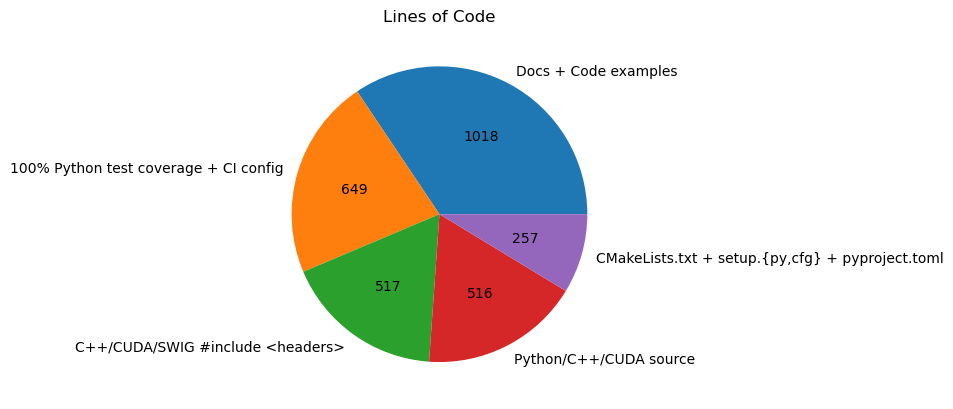

In [1]:
import matplotlib.pyplot as plt
locs = [764 + 254, 458 + 192, 518, 421 + 95, 134 + 115 + 8]
plt.pie(locs, labels=["Docs + Code examples", "100% Python test coverage + CI config", "C++/CUDA/SWIG #include <headers>", "Python/C++/CUDA source", "CMakeLists.txt + setup.{py,cfg} + pyproject.toml"], autopct=lambda pct: int(pct / 100 * sum(locs))); plt.title("Lines of Code");

- mostly docs + examples + tests
- meat ~1k loc divided evenly between template headers & source
- one of smallest libs I've made yet ridiculously powerful

[![Docs](https://img.shields.io/badge/docs-amypad.github.io/CuVec-blue.svg?logo=mdbook)](https://amypad.github.io/CuVec)

# Summary: Winning

- Less boilerplate code (fewer bugs, easier debugging, and faster prototyping)
- Fewer memory copies (faster execution)
- Lower memory usage (do more with less hardware)

## What Next

- Integration tutorials (Numba, CuPy, PyTorch, PyArrow, ArrayViews, JAX, PyCUDA, DALI, RAPIDS, ...)
- ... any feature requests?

----

<a href="https://cdcl.ml">Casper da Costa-Luis</a> | [![@casperdcl](https://img.shields.io/badge/GitHub-%40casperdcl-black.svg?style=social&logo=github)](https://github.com/casperdcl) | [![sponsor](https://img.shields.io/badge/♥_subscribe-newsletter-blue.svg)](https://cdcl.ml/sponsor)
-|-|-